In [1]:
import nibabel as nib
import numpy as np
import scipy as scpy
import matplotlib.pyplot as plt
from nibabel.affines import apply_affine
import numpy.linalg as npl

In [2]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")
        
def coordinates_reference2CTmapping(ref_affine, CT_affine, Ci, Cj, Ck):
    """ Return X, Y, Z CT coordinates from reference segmentation coordinates Ci, Cj, Ck"""
    Reference_voxel2CT_voxel = npl.inv(CT_affine).dot(ref_affine)
    [X, Y, Z] = apply_affine(Reference_voxel2CT_voxel, [Ci, Cj, Ck])
    return X, Y, Z

def volume_reference2CTmapping(reference_segmentation, CT_volume):
    """ Returns a new CT volume where the structure from the reference segmentation are colored"""
    data_reference = reference_segmentation.get_fdata()
    data_CT_volume = CT_volume.get_fdata()
    maxIntensity = np.amax(data_CT_volume)
    
    nonegative_subs = np.where(data_reference>0)
    for i in range(len(nonegative_subs[0])):
        [X, Y, Z] = coordinates_reference2CTmapping(reference_segmentation.affine, CT_volume.affine, nonegative_subs[0][i], nonegative_subs[1][i], nonegative_subs[2][i])
        data_CT_volume[int(X), int(Y), int(Z)] = maxIntensity
    
    return data_CT_volume

In [29]:
img = nib.load('800_L/image.nii')
img2 = img
#img_Canal = nib.load('800_L/External Auditory Canal.nii')

In [38]:
#Scanner pixel dimensions (img=nib.load -> print(img.header)
#750_R pixdim:
#pixdim: [1., 0.1, 0.1, 0.10000229, 0., 0., 0., 0.]

#772_722_L pixdim:
#pixdim: [1., 0.1, 0.1, 0.10000229, 0., 0., 0., 0.]

#780_R pixdim:
#pixdim: [1., 0.1, 0.1, 0.10000229, 0., 0., 0., 0.]

#791_L pixdim:
#pixdim: [1., 0.1, 0.1, 0.10000229, 0., 0., 0., 0.]

#791_R pixdim:
#pixdim: [1., 0.1, 0.1, 0.10000229, 0., 0., 0., 0.]

#796_L pixdim:
#pixdim: [1., 0.1, 0.1, 0.09999847, 0., 0., 0., 0.]

#796_R pixdim:
#pixdim: [1., 0.1, 0.1, 0.10000229, 0., 0., 0., 0.]

#800_L pixdim:
#pixdim: [1., 0.1, 0.1, 0.10000229, 0., 0., 0., 0.]

#all the acquisitions have the same voxel X,Y sizes, one varies in the Z size,
#actually Z corresponds to the depth

In [629]:
new_CT_volume = volume_reference2CTmapping(img_Canal, img)

In [30]:
data_orig=img2.get_fdata()
#data_with_ref=new_CT_volume

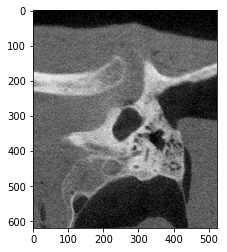

In [656]:
imgplot = plt.imshow(data_orig[178+38,:,:], cmap='gray')

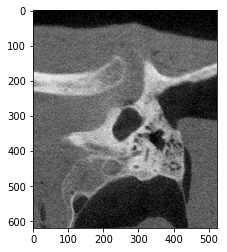

In [657]:
Islice=data_orig[178+38,:,:]
imgplot = plt.imshow(Islice, cmap='gray')

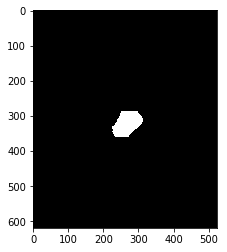

In [510]:
IonlyRef = Islice>6000
imgplot = plt.imshow(IonlyRef, cmap='gray')

In [511]:
[Cx_800_L, Cy_800_L] = ndimage.measurements.center_of_mass(IonlyRef)

In [513]:
int(Cx_800_L)

322

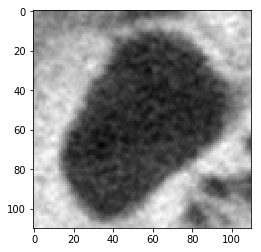

In [658]:
imgplot = plt.imshow(data_orig[178+38,int(Cx_800_L)-55:int(Cx_800_L)+55,int(Cy_800_L)-55:int(Cy_800_L)+55], cmap='gray')

In [3]:
Cx_750_R=527
Cy_750_R=364

Cx_772_722_L=171
Cy_772_722_L=341

Cx_780_R=549
Cy_780_R=198

Cx_791_L=241
Cy_791_L=279

Cx_796_L=254
Cy_796_L=368

Cx_796_R=156
Cy_796_R=300

Cx_800_L=322
Cy_800_L=267

In [31]:
#Template_750_R = data_orig[int(Cx_750_R)-55:int(Cx_750_R)+55,424,int(Cy_750_R)-55:int(Cy_750_R)+55]
#Template_772_722_L = data_orig[201+38,int(Cx_772_722_L)-55:int(Cx_772_722_L)+55,int(Cy_772_722_L)-55:int(Cy_772_722_L)+55]
#Template_780_R = data_orig[int(Cx_780_R)-55:int(Cx_780_R)+55,350,int(Cy_780_R)-55:int(Cy_780_R)+55]
#Template_791_L = data_orig[184+59,int(Cx_791_L)-55:int(Cx_791_L)+55,int(Cy_791_L)-55:int(Cy_791_L)+55]
#Template_796_L = data_orig[148+34,int(Cx_796_L)-55:int(Cx_796_L)+55,int(Cy_796_L)-55:int(Cy_796_L)+55]
#Template_796_R = data_orig[445+54,int(Cx_796_R)-55:int(Cx_796_R)+55,int(Cy_796_R)-55:int(Cy_796_R)+55]
Template_800_L = data_orig[178+38,int(Cx_800_L)-55:int(Cx_800_L)+55,int(Cy_800_L)-55:int(Cy_800_L)+55]

In [40]:
Template_800_L = data_orig[178+38,int(Cx_800_L)-55:int(Cx_800_L)+55,int(Cy_800_L)-55:int(Cy_800_L)+55]

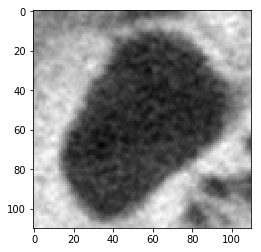

In [33]:
imgplot = plt.imshow(Template_800_L, cmap='gray')

In [34]:
cubeTemplates = np.zeros((110,110,7))
cubeTemplates[:,:,0] = Template_750_R
cubeTemplates[:,:,1] = Template_772_722_L
cubeTemplates[:,:,2] = Template_780_R
cubeTemplates[:,:,3] = Template_791_L
cubeTemplates[:,:,4] = Template_796_L
cubeTemplates[:,:,5] = Template_796_R
cubeTemplates[:,:,6] = Template_800_L

In [35]:
meanTemplate = np.mean(cubeTemplates, axis=2)

In [36]:
np.shape(meanTemplate)

(110, 110)

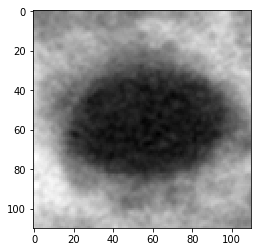

In [37]:
imgplot = plt.imshow(meanTemplate, cmap='gray')

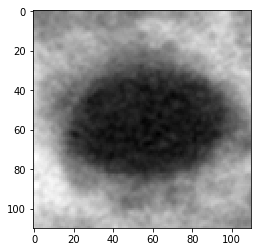

In [47]:
imgplot = plt.imshow(meanTemplate, cmap='gray')
plt.savefig("meanTemplate.png")

In [48]:
img = nib.load('750_L/image.nii')

In [49]:
def assert_nD(array, ndim, arg_name='image'):
    """
    Verify an array meets the desired ndims and array isn't empty.
    Parameters
    ----------
    array : array-like
        Input array to be validated
    ndim : int or iterable of ints
        Allowable ndim or ndims for the array.
    arg_name : str, optional
        The name of the array in the original function.
    """
    array = np.asanyarray(array)
    msg_incorrect_dim = "The parameter `%s` must be a %s-dimensional array"
    msg_empty_array = "The parameter `%s` cannot be an empty array"
    if isinstance(ndim, int):
        ndim = [ndim]
    if array.size == 0:
        raise ValueError(msg_empty_array % (arg_name))
    if not array.ndim in ndim:
        raise ValueError(msg_incorrect_dim % (arg_name, '-or-'.join([str(n) for n in ndim])))

#import numpy as np
from scipy.signal import fftconvolve

#from .._shared.utils import assert_nD


def _window_sum_2d(image, window_shape):

    window_sum = np.cumsum(image, axis=0)
    window_sum = (window_sum[window_shape[0]:-1]
                  - window_sum[:-window_shape[0] - 1])

    window_sum = np.cumsum(window_sum, axis=1)
    window_sum = (window_sum[:, window_shape[1]:-1]
                  - window_sum[:, :-window_shape[1] - 1])

    return window_sum


def _window_sum_3d(image, window_shape):

    window_sum = _window_sum_2d(image, window_shape)

    window_sum = np.cumsum(window_sum, axis=2)
    window_sum = (window_sum[:, :, window_shape[2]:-1]
                  - window_sum[:, :, :-window_shape[2] - 1])

    return window_sum


def match_template(image, template, pad_input=False, mode='constant',
                   constant_values=0):
    """Match a template to a 2-D or 3-D image using normalized correlation.
    The output is an array with values between -1.0 and 1.0. The value at a
    given position corresponds to the correlation coefficient between the image
    and the template.
    For `pad_input=True` matches correspond to the center and otherwise to the
    top-left corner of the template. To find the best match you must search for
    peaks in the response (output) image.
    Parameters
    ----------
    image : (M, N[, D]) array
        2-D or 3-D input image.
    template : (m, n[, d]) array
        Template to locate. It must be `(m <= M, n <= N[, d <= D])`.
    pad_input : bool
        If True, pad `image` so that output is the same size as the image, and
        output values correspond to the template center. Otherwise, the output
        is an array with shape `(M - m + 1, N - n + 1)` for an `(M, N)` image
        and an `(m, n)` template, and matches correspond to origin
        (top-left corner) of the template.
    mode : see `numpy.pad`, optional
        Padding mode.
    constant_values : see `numpy.pad`, optional
        Constant values used in conjunction with ``mode='constant'``.
    Returns
    -------
    output : array
        Response image with correlation coefficients.
    Notes
    -----
    Details on the cross-correlation are presented in [1]_. This implementation
    uses FFT convolutions of the image and the template. Reference [2]_
    presents similar derivations but the approximation presented in this
    reference is not used in our implementation.
    References
    ----------
    .. [1] J. P. Lewis, "Fast Normalized Cross-Correlation", Industrial Light
           and Magic.
    .. [2] Briechle and Hanebeck, "Template Matching using Fast Normalized
           Cross Correlation", Proceedings of the SPIE (2001).
           :DOI:`10.1117/12.421129`
    Examples
    --------
    >>> template = np.zeros((3, 3))
    >>> template[1, 1] = 1
    >>> template
    array([[ 0.,  0.,  0.],
           [ 0.,  1.,  0.],
           [ 0.,  0.,  0.]])
    >>> image = np.zeros((6, 6))
    >>> image[1, 1] = 1
    >>> image[4, 4] = -1
    >>> image
    array([[ 0.,  0.,  0.,  0.,  0.,  0.],
           [ 0.,  1.,  0.,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  0., -1.,  0.],
           [ 0.,  0.,  0.,  0.,  0.,  0.]])
    >>> result = match_template(image, template)
    >>> np.round(result, 3)
    array([[ 1.   , -0.125,  0.   ,  0.   ],
           [-0.125, -0.125,  0.   ,  0.   ],
           [ 0.   ,  0.   ,  0.125,  0.125],
           [ 0.   ,  0.   ,  0.125, -1.   ]])
    >>> result = match_template(image, template, pad_input=True)
    >>> np.round(result, 3)
    array([[-0.125, -0.125, -0.125,  0.   ,  0.   ,  0.   ],
           [-0.125,  1.   , -0.125,  0.   ,  0.   ,  0.   ],
           [-0.125, -0.125, -0.125,  0.   ,  0.   ,  0.   ],
           [ 0.   ,  0.   ,  0.   ,  0.125,  0.125,  0.125],
           [ 0.   ,  0.   ,  0.   ,  0.125, -1.   ,  0.125],
           [ 0.   ,  0.   ,  0.   ,  0.125,  0.125,  0.125]])
    """
    assert_nD(image, (2, 3))

    if image.ndim < template.ndim:
        raise ValueError("Dimensionality of template must be less than or "
                         "equal to the dimensionality of image.")
    if np.any(np.less(image.shape, template.shape)):
        raise ValueError("Image must be larger than template.")

    image_shape = image.shape

    image = np.array(image, dtype=np.float64, copy=False)

    pad_width = tuple((width, width) for width in template.shape)
    if mode == 'constant':
        image = np.pad(image, pad_width=pad_width, mode=mode,
                       constant_values=constant_values)
    else:
        image = np.pad(image, pad_width=pad_width, mode=mode)

    # Use special case for 2-D images for much better performance in
    # computation of integral images
    if image.ndim == 2:
        image_window_sum = _window_sum_2d(image, template.shape)
        image_window_sum2 = _window_sum_2d(image ** 2, template.shape)
    elif image.ndim == 3:
        image_window_sum = _window_sum_3d(image, template.shape)
        image_window_sum2 = _window_sum_3d(image ** 2, template.shape)

    template_mean = template.mean()
    template_volume = np.prod(template.shape)
    template_ssd = np.sum((template - template_mean) ** 2)

    if image.ndim == 2:
        xcorr = fftconvolve(image, template[::-1, ::-1],
                            mode="valid")[1:-1, 1:-1]
    elif image.ndim == 3:
        xcorr = fftconvolve(image, template[::-1, ::-1, ::-1],
                            mode="valid")[1:-1, 1:-1, 1:-1]

    numerator = xcorr - image_window_sum * template_mean

    denominator = image_window_sum2
    np.multiply(image_window_sum, image_window_sum, out=image_window_sum)
    np.divide(image_window_sum, template_volume, out=image_window_sum)
    denominator -= image_window_sum
    denominator *= template_ssd
    np.maximum(denominator, 0, out=denominator)  # sqrt of negative number not allowed
    np.sqrt(denominator, out=denominator)

    response = np.zeros_like(xcorr, dtype=np.float64)

    # avoid zero-division
    mask = denominator > np.finfo(np.float64).eps

    response[mask] = numerator[mask] / denominator[mask]

    slices = []
    for i in range(template.ndim):
        if pad_input:
            d0 = (template.shape[i] - 1) // 2
            d1 = d0 + image_shape[i]
        else:
            d0 = template.shape[i] - 1
            d1 = d0 + image_shape[i] - template.shape[i] + 1
        slices.append(slice(d0, d1))

    return response[tuple(slices)]

In [50]:
data_orig=img.get_fdata()

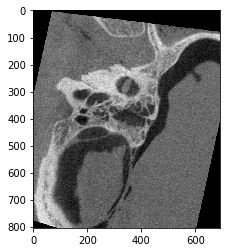

In [51]:
imgplot = plt.imshow(data_orig[220,:,:], cmap='gray')
result_Slice_220 = match_template(data_orig[220,:,:], meanTemplate, pad_input=True);

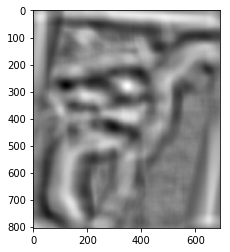

In [52]:
imgplot = plt.imshow(result_Slice_220, cmap='gray')

In [55]:
np.where(result_Slice_220==np.amax(result_Slice_220))

(array([280]), array([349]))

(625, 805, 692)

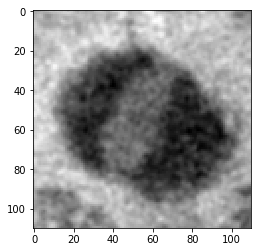

In [52]:
imgplot = plt.imshow(data_orig[220,280-55:280+55,349-55:349+55], cmap='gray')
np.shape(data_orig)

In [53]:
Iresult3D = np.zeros((625, 805, 692))
for z in range(625):
    Islice = data_orig[z,:,:]
    Iresult3D[z,:,:] = match_template(Islice, meanTemplate, pad_input=True);
    
np.shape(Iresult3D)

(625, 805, 692)

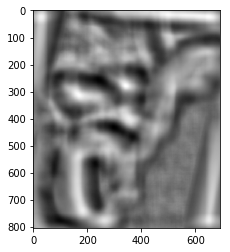

In [54]:
%matplotlib inline
imgplot = plt.imshow(Iresult3D[240,:,:], cmap='gray')

In [56]:
np.where(Iresult3D==0.8166504310212146)

(array([200]), array([283]), array([355]))

In [56]:
Iresult3D[200,283,355]

0.8166504310212146

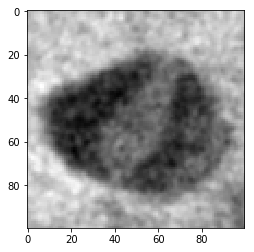

In [117]:
imgplot = plt.imshow(data_orig[200,283-50:283+50,355-50:355+50], cmap='gray')

In [142]:
img = nib.load('750_L/image.nii')
img2 = img
img_Canal = nib.load('750_L/External Auditory Canal.nii')

In [143]:
new_CT_volume = volume_reference2CTmapping(img_Canal, img)

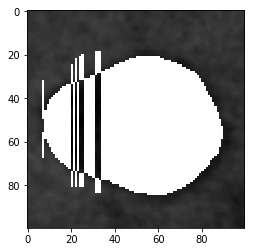

In [144]:
imgplot = plt.imshow(new_CT_volume[200,283-50:283+50,355-50:355+50], cmap='gray')

In [108]:
img_750_R = nib.load('750_R/image.nii')
img2_750_R = img_750_R
img_Canal_750_R = nib.load('750_R/External Auditory Canal.nii')

In [98]:
new_CT_volume_750_R = volume_reference2CTmapping(img_Canal_750_R, img_750_R)

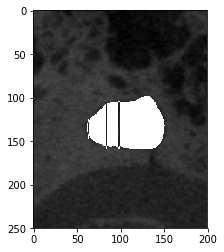

In [102]:
imgplot = plt.imshow(new_CT_volume_750_R[400:650,440,250:450], cmap='gray')

In [109]:
data_orig_750_R=img2_750_R.get_fdata()

In [3]:
imgplot = plt.imshow(data_orig_750_R[450:600,440,270:430], cmap='gray')

NameError: name 'plt' is not defined

In [115]:
croppedVOI_750_R=data_orig_750_R[450:600,400:447,270:430]

In [116]:
import numpy, scipy.io
scipy.io.savemat('croppedVOI_750_R.mat', mdict={'croppedVOI_750_R': croppedVOI_750_R})

In [118]:
scipy.io.savemat('data_orig_750_L.mat', mdict={'data_orig_750_L': data_orig})

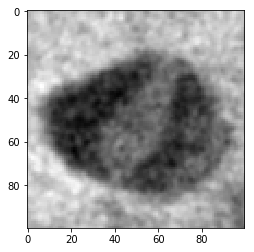

In [141]:
%matplotlib inline
imgplot = plt.imshow(data_orig[200,283-50:283+50,355-50:355+50], cmap='gray')

In [122]:
np.shape(data_orig)

(625, 805, 692)

In [140]:
data_orig[200,399,399]

-468.0

In [ ]:
scipy.io.savemat('data_ref_750_L.mat', mdict={'data_ref_750_L': new_CT_volume})

In [2]:
img_750_R.affine

NameError: name 'img_750_R' is not defined

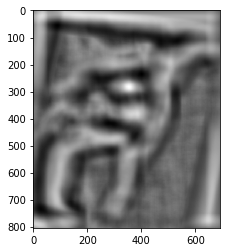

In [58]:
imgplot = plt.imshow(Iresult3D[200,:,:], cmap='gray')
#plt.savefig("CorrelationMap.png")

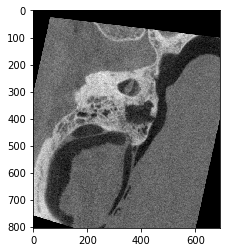

In [59]:
imgplot = plt.imshow(data_orig[200,:,:], cmap='gray')
#plt.savefig("slice200Test.png")